In [1]:
import numpy as np
import netCDF4 as nc4
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import os
import pandas as pd
import geopandas as gpd
from cmcrameri import cm
from tqdm.notebook import tqdm, trange
import time    # to be used in loop iterations
import cartopy.crs as ccrs
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from scipy.interpolate import griddata

In [2]:
Coastline = pd.read_pickle('DATA/costline_wsb.pkl')

In [3]:
# create WSB polygon
x_ps_point_list = [0.15e6, 0.15e6, 1.7e6, 1.7e6, 0.15e6]
y_ps_point_list = [-1e6, -2.2e6, -2.2e6, -1e6, -16]

polygon_geom = Polygon(zip(x_ps_point_list, y_ps_point_list))
polygon = gpd.GeoDataFrame(index=[0], crs='epsg:3031', geometry=[polygon_geom])    


In [4]:
ANTgeo_wsb = gpd.read_file('DATA/ATA_SCAR_GeoMAP_Geology_v2022_08.gpkg', layer='ATA_GeoMAP_geological_units_v2022_08'  , mask = polygon)
faults = gpd.read_file('DATA//ATA_SCAR_GeoMAP_Geology_v2022_08.gpkg' , layer='ATA_GeoMAP_faults_v2022_08', mask = polygon)
fault = faults[faults['DESCR'] == 'fault (inactive), feature inferred']

Topo = pd.read_csv('DATA/bedmachine_bed_wsb_extended_area_500m_reso.txt', skiprows=1, 
                        names=['x_ps' , 'y_ps' , 'bedrock'])
Bedrock_data = Topo.to_numpy()


In [5]:
Meander_intrusive_suite = ANTgeo_wsb[(ANTgeo_wsb['FMNEQUIV'] == 'Meander alkali-granite and syenite')|
                                    (ANTgeo_wsb['GRPEQUIV'] == 'McMurdo Volcanic Group')]



Melbourne_volcanic = ANTgeo_wsb[(ANTgeo_wsb['FMNEQUIV'] == 'Malta trachyte and rhyolite') |
                                (ANTgeo_wsb['SBGRPEQUIV'] == 'Hallett Volcanics') |
                                (ANTgeo_wsb['SBGRPEQUIV'] == 'Melbourne Volcanics')]

Kirkpatrick_Basalt = ANTgeo_wsb[(ANTgeo_wsb['FMNEQUIV'] == 'Kirkpatrick Basalt')]

FD_and_Beacon_supergroup = ANTgeo_wsb[(ANTgeo_wsb['FMNEQUIV'] == 'undifferentiated Beacon Supergroup and Ferrar Dolerite') |
                                      (ANTgeo_wsb['FMNEQUIV'] == 'Ferrar Dolerite')]

Admiralty_Igneous_Complex = ANTgeo_wsb[ANTgeo_wsb['GRPEQUIV'] == 'Admiralty Igneous Complex']

Wilson_Terrane = ANTgeo_wsb[ANTgeo_wsb['TECTPROV'] == 'Wilson Terrane']

Wilson_Terrane = ANTgeo_wsb[ANTgeo_wsb['TECTPROV'] == 'Wilson Terrane']

Granite_Harbour_Intrusives = ANTgeo_wsb[ANTgeo_wsb['GRPEQUIV'] == 'Granite Harbour Intrusives']

Lanterman = ANTgeo_wsb[(ANTgeo_wsb['FMNEQUIV'] == 'Lanterman Metamorphics')|
                       (ANTgeo_wsb['FMNEQUIV'] == 'Lanterman Conglomerate')]

Bowers_Terrane = ANTgeo_wsb[ANTgeo_wsb['TECTPROV'] == 'Bowers Terrane']

Millen_Schist = ANTgeo_wsb[ANTgeo_wsb['FMNEQUIV'] == 'Millen Schist']

Robertson_Bay_Group = ANTgeo_wsb[ANTgeo_wsb['TECTPROV'] == 'Robertson Bay Terrane']


In [6]:
# create WSB polygon
x_ps_MessaRange_point_list = [
    507404.438756447,
    569404.438756447,
    569404.438756447,
    507404.438756447,
    507404.438756447,
]
y_ps_MessaRange_point_list = [
    -1773582.79591434,
    -1773582.79591434,
    -1699582.79591434,
    -1699582.79591434,
    -1773582.79591434,
]

polygon_geom_MessaRange = Polygon(
    zip(x_ps_MessaRange_point_list, y_ps_MessaRange_point_list)
)
polygon_MessaRange = gpd.GeoDataFrame(
    index=[0], crs="epsg:3031", geometry=[polygon_geom_MessaRange]
)

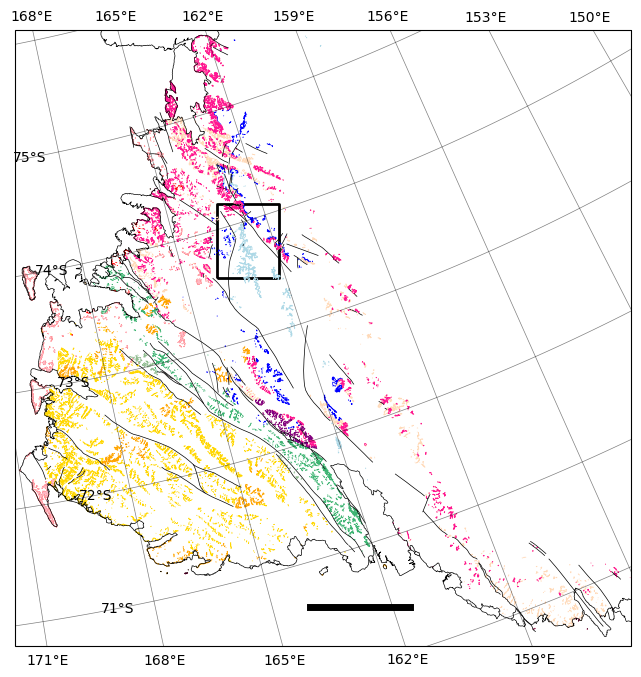

In [8]:
cmap_topo =  cm.bukavu

figure1 = plt.figure(figsize=(8,8),facecolor='white')
# # subplot tectonic data
ax2 = plt.subplot(1, 1, 1 , projection=ccrs.SouthPolarStereo())
# plt.title('formation',fontsize=15)

polygon_MessaRange.plot(ax=ax2, alpha=1, facecolor="None", edgecolor="k", linewidth=2)


Meander_intrusive_suite.boundary.plot(ax=ax2 , color='red', alpha=1, linewidth=.5)
Melbourne_volcanic.boundary.plot(ax=ax2 , color='lightpink', alpha=1, linewidth=.5)
Kirkpatrick_Basalt.boundary.plot(ax=ax2 , color='lightblue', alpha=1, linewidth=.5)
FD_and_Beacon_supergroup.boundary.plot(ax=ax2 , color='blue', alpha=1, linewidth=.5)
Admiralty_Igneous_Complex.boundary.plot(ax=ax2 , color='orange', alpha=1, linewidth=.5)
Wilson_Terrane.boundary.plot(ax=ax2 , color='peachpuff', alpha=1, linewidth=.5)
Granite_Harbour_Intrusives.boundary.plot(ax=ax2 , color='deeppink', alpha=1, linewidth=.5)
Lanterman.boundary.plot(ax=ax2 , color='purple', alpha=1, linewidth=.5)
Bowers_Terrane.boundary.plot(ax=ax2 , color='mediumseagreen', alpha=1, linewidth=.5)
Millen_Schist.boundary.plot(ax=ax2 , color='darkseagreen', alpha=1, linewidth=.5)
Robertson_Bay_Group.boundary.plot(ax=ax2 , color='gold', alpha=1, linewidth=.5)
# im2 = plt.scatter(Bedrock_data[:,0] , Bedrock_data[:,1] , .1 , c=Bedrock_data[:,2] , alpha=0.1 , cmap = cmap_topo , vmin= -2500 , vmax = 2500)
fault.plot(ax=ax2 , color = 'k' ,  linewidth=0.5)
ax2.plot([0.6e6,0.6e6+100000],[-2.1e6,-2.1e6],'-k', linewidth=5) # 300 km scale bar
ax2.set_extent([169.5 , 155 , -75, -70.7], ccrs.PlateCarree())
ax2.gridlines(linewidth=0.5,draw_labels=True , color='k', alpha=0.5, linestyle='-' , rotate_labels=0)
Coastline.plot(ax=ax2 , color = 'k' , linewidth = 0.5)
# ax2.legend(loc='upper right')
# cb = plt.colorbar(im2, shrink=.35)
# cb.ax.set_title("nT",fontsize=15)

plt.savefig('Formation_GeoMap_TAM.png',facecolor=figure1.get_facecolor(), transparent=True)

Text(0.5, 1.0, 'nT')

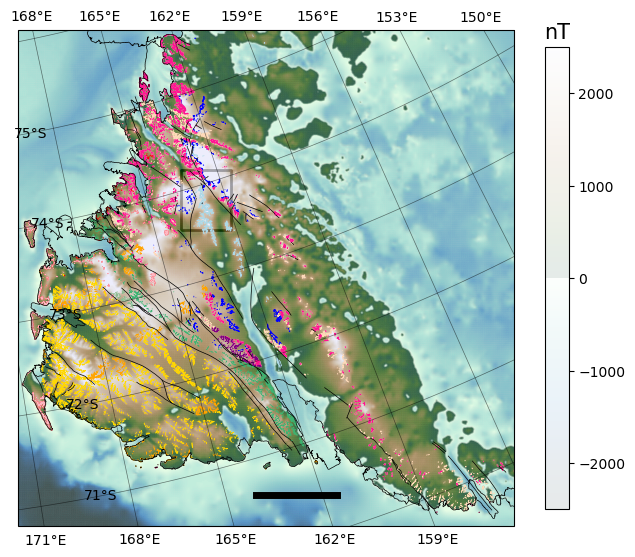

In [9]:
cmap_topo =  cm.bukavu

figure1 = plt.figure(figsize=(8,8),facecolor='white')
# # subplot tectonic data
ax2 = plt.subplot(1, 1, 1 , projection=ccrs.SouthPolarStereo())
# plt.title('formation',fontsize=15)

polygon_MessaRange.plot(ax=ax2, alpha=1, facecolor="None", edgecolor="k", linewidth=2)


Meander_intrusive_suite.boundary.plot(ax=ax2 , color='red', alpha=1, linewidth=.5)
Melbourne_volcanic.boundary.plot(ax=ax2 , color='lightpink', alpha=1, linewidth=.5)
Kirkpatrick_Basalt.boundary.plot(ax=ax2 , color='lightblue', alpha=1, linewidth=.5)
FD_and_Beacon_supergroup.boundary.plot(ax=ax2 , color='blue', alpha=1, linewidth=.5)
Admiralty_Igneous_Complex.boundary.plot(ax=ax2 , color='orange', alpha=1, linewidth=.5)
Wilson_Terrane.boundary.plot(ax=ax2 , color='peachpuff', alpha=1, linewidth=.5)
Granite_Harbour_Intrusives.boundary.plot(ax=ax2 , color='deeppink', alpha=1, linewidth=.5)
Lanterman.boundary.plot(ax=ax2 , color='purple', alpha=1, linewidth=.5)
Bowers_Terrane.boundary.plot(ax=ax2 , color='mediumseagreen', alpha=1, linewidth=.5)
Millen_Schist.boundary.plot(ax=ax2 , color='darkseagreen', alpha=1, linewidth=.5)
Robertson_Bay_Group.boundary.plot(ax=ax2 , color='gold', alpha=1, linewidth=.5)
im2 = plt.scatter(Bedrock_data[:,0] , Bedrock_data[:,1] , .1 , c=Bedrock_data[:,2] , alpha=0.1 , cmap = cmap_topo , vmin= -2500 , vmax = 2500)
fault.plot(ax=ax2 , color = 'k' ,  linewidth=0.5)
ax2.plot([0.6e6,0.6e6+100000],[-2.1e6,-2.1e6],'-k', linewidth=5) # 300 km scale bar
ax2.set_extent([169.5 , 155 , -75, -70.7], ccrs.PlateCarree())
ax2.gridlines(linewidth=0.5,draw_labels=True , color='k', alpha=0.5, linestyle='-' , rotate_labels=0)
Coastline.plot(ax=ax2 , color = 'k' , linewidth = 0.5)
# ax2.legend(loc='upper right')
cb = plt.colorbar(im2, shrink=.75)
cb.ax.set_title("nT",fontsize=15)

# plt.savefig('Formation_GeoMap_TAM.png',facecolor=figure1.get_facecolor(), transparent=True)

Text(0.5, 1.0, 'nT')

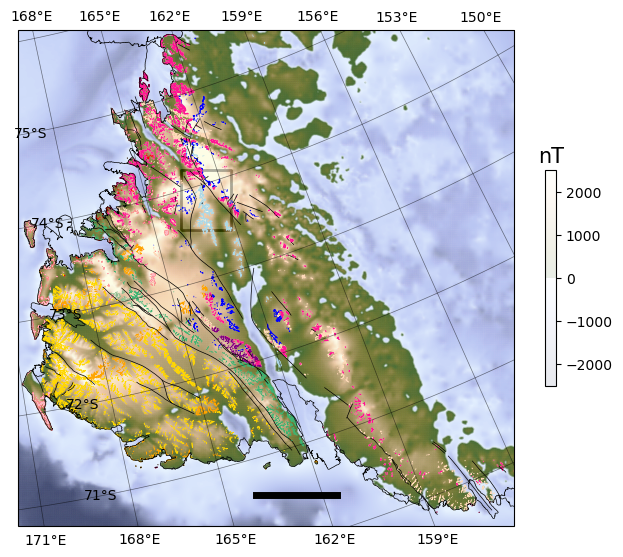

In [10]:
cmap_topo =  cm.oleron

figure1 = plt.figure(figsize=(8,8),facecolor='white')
# # subplot tectonic data
ax2 = plt.subplot(1, 1, 1 , projection=ccrs.SouthPolarStereo())
# plt.title('formation',fontsize=15)

polygon_MessaRange.plot(ax=ax2, alpha=1, facecolor="None", edgecolor="k", linewidth=2)


Meander_intrusive_suite.boundary.plot(ax=ax2 , color='red', alpha=1, linewidth=.5)
Melbourne_volcanic.boundary.plot(ax=ax2 , color='lightpink', alpha=1, linewidth=.5)
Kirkpatrick_Basalt.boundary.plot(ax=ax2 , color='lightblue', alpha=1, linewidth=.5)
FD_and_Beacon_supergroup.boundary.plot(ax=ax2 , color='blue', alpha=1, linewidth=.5)
Admiralty_Igneous_Complex.boundary.plot(ax=ax2 , color='orange', alpha=1, linewidth=.5)
Wilson_Terrane.boundary.plot(ax=ax2 , color='peachpuff', alpha=1, linewidth=.5)
Granite_Harbour_Intrusives.boundary.plot(ax=ax2 , color='deeppink', alpha=1, linewidth=.5)
Lanterman.boundary.plot(ax=ax2 , color='purple', alpha=1, linewidth=.5)
Bowers_Terrane.boundary.plot(ax=ax2 , color='mediumseagreen', alpha=1, linewidth=.5)
Millen_Schist.boundary.plot(ax=ax2 , color='darkseagreen', alpha=1, linewidth=.5)
Robertson_Bay_Group.boundary.plot(ax=ax2 , color='gold', alpha=1, linewidth=.5)
im2 = plt.scatter(Bedrock_data[:,0] , Bedrock_data[:,1] , .1 , c=Bedrock_data[:,2] , alpha=0.1 , cmap = cmap_topo , vmin= -2500 , vmax = 2500)
fault.plot(ax=ax2 , color = 'k' ,  linewidth=0.5)
ax2.plot([0.6e6,0.6e6+100000],[-2.1e6,-2.1e6],'-k', linewidth=5) # 300 km scale bar
ax2.set_extent([169.5 , 155 , -75, -70.7], ccrs.PlateCarree())
ax2.gridlines(linewidth=0.5,draw_labels=True , color='k', alpha=0.5, linestyle='-' , rotate_labels=0)
Coastline.plot(ax=ax2 , color = 'k' , linewidth = 0.5)
# ax2.legend(loc='upper right')
cb = plt.colorbar(im2, shrink=.35)
cb.ax.set_title("nT",fontsize=15)

# plt.savefig('Formation_GeoMap_TAM.png',facecolor=figure1.get_facecolor(), transparent=True)

Text(0.5, 1.0, 'nT')

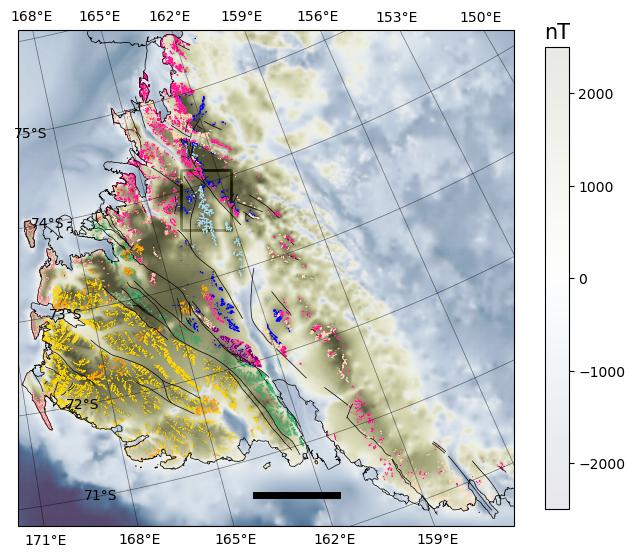

In [11]:
cmap_topo =  cm.broc

figure1 = plt.figure(figsize=(8,8),facecolor='white')
# # subplot tectonic data
ax2 = plt.subplot(1, 1, 1 , projection=ccrs.SouthPolarStereo())
# plt.title('formation',fontsize=15)

polygon_MessaRange.plot(ax=ax2, alpha=1, facecolor="None", edgecolor="k", linewidth=2)


Meander_intrusive_suite.boundary.plot(ax=ax2 , color='red', alpha=1, linewidth=.5)
Melbourne_volcanic.boundary.plot(ax=ax2 , color='lightpink', alpha=1, linewidth=.5)
Kirkpatrick_Basalt.boundary.plot(ax=ax2 , color='lightblue', alpha=1, linewidth=.5)
FD_and_Beacon_supergroup.boundary.plot(ax=ax2 , color='blue', alpha=1, linewidth=.5)
Admiralty_Igneous_Complex.boundary.plot(ax=ax2 , color='orange', alpha=1, linewidth=.5)
Wilson_Terrane.boundary.plot(ax=ax2 , color='peachpuff', alpha=1, linewidth=.5)
Granite_Harbour_Intrusives.boundary.plot(ax=ax2 , color='deeppink', alpha=1, linewidth=.5)
Lanterman.boundary.plot(ax=ax2 , color='purple', alpha=1, linewidth=.5)
Bowers_Terrane.boundary.plot(ax=ax2 , color='mediumseagreen', alpha=1, linewidth=.5)
Millen_Schist.boundary.plot(ax=ax2 , color='darkseagreen', alpha=1, linewidth=.5)
Robertson_Bay_Group.boundary.plot(ax=ax2 , color='gold', alpha=1, linewidth=.5)
im2 = plt.scatter(Bedrock_data[:,0] , Bedrock_data[:,1] , .1 , c=Bedrock_data[:,2] , alpha=0.1 , cmap = cmap_topo , vmin= -2500 , vmax = 2500)
fault.plot(ax=ax2 , color = 'k' ,  linewidth=0.5)
ax2.plot([0.6e6,0.6e6+100000],[-2.1e6,-2.1e6],'-k', linewidth=5) # 300 km scale bar
ax2.set_extent([169.5 , 155 , -75, -70.7], ccrs.PlateCarree())
ax2.gridlines(linewidth=0.5,draw_labels=True , color='k', alpha=0.5, linestyle='-' , rotate_labels=0)
Coastline.plot(ax=ax2 , color = 'k' , linewidth = 0.5)
# ax2.legend(loc='upper right')
cb = plt.colorbar(im2, shrink=.75)
cb.ax.set_title("nT",fontsize=15)

# plt.savefig('Formation_GeoMap_TAM.png',facecolor=figure1.get_facecolor(), transparent=True)

Text(0.5, 1.0, 'nT')

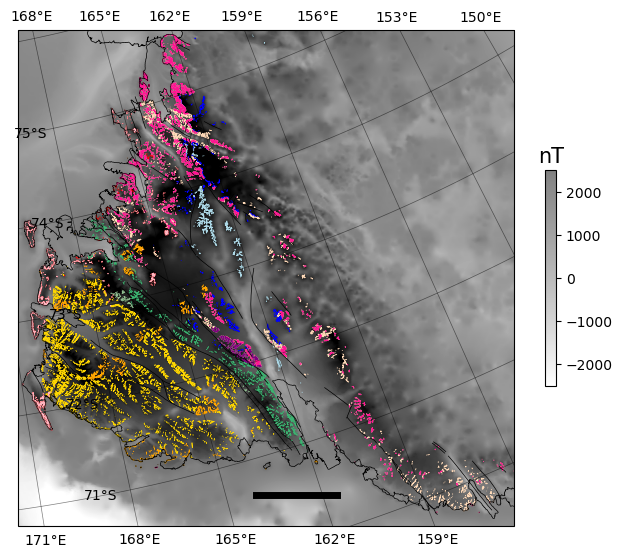

In [12]:
cmap_topo =  cm.grayC

figure1 = plt.figure(figsize=(8,8),facecolor='white')
# # subplot tectonic data
ax2 = plt.subplot(1, 1, 1 , projection=ccrs.SouthPolarStereo())
# plt.title('formation',fontsize=15)

polygon_MessaRange.plot(ax=ax2, alpha=1, facecolor="None", edgecolor="k", linewidth=2)


Meander_intrusive_suite.boundary.plot(ax=ax2 , color='red', alpha=1, linewidth=.5)
Melbourne_volcanic.boundary.plot(ax=ax2 , color='lightpink', alpha=1, linewidth=.5)
Kirkpatrick_Basalt.boundary.plot(ax=ax2 , color='lightblue', alpha=1, linewidth=.5)
FD_and_Beacon_supergroup.boundary.plot(ax=ax2 , color='blue', alpha=1, linewidth=.5)
Admiralty_Igneous_Complex.boundary.plot(ax=ax2 , color='orange', alpha=1, linewidth=.5)
Wilson_Terrane.boundary.plot(ax=ax2 , color='peachpuff', alpha=1, linewidth=.5)
Granite_Harbour_Intrusives.boundary.plot(ax=ax2 , color='deeppink', alpha=1, linewidth=.5)
Lanterman.boundary.plot(ax=ax2 , color='purple', alpha=1, linewidth=.5)
Bowers_Terrane.boundary.plot(ax=ax2 , color='mediumseagreen', alpha=1, linewidth=.5)
Millen_Schist.boundary.plot(ax=ax2 , color='darkseagreen', alpha=1, linewidth=.5)
Robertson_Bay_Group.boundary.plot(ax=ax2 , color='gold', alpha=1, linewidth=.5)
im2 = plt.scatter(Bedrock_data[:,0] , Bedrock_data[:,1] , .1 , c=Bedrock_data[:,2] , alpha=0.5 , cmap = cmap_topo , vmin= -2500 , vmax = 2500)
fault.plot(ax=ax2 , color = 'k' ,  linewidth=0.5)
ax2.plot([0.6e6,0.6e6+100000],[-2.1e6,-2.1e6],'-k', linewidth=5) # 300 km scale bar
ax2.set_extent([169.5 , 155 , -75, -70.7], ccrs.PlateCarree())
ax2.gridlines(linewidth=0.5,draw_labels=True , color='k', alpha=0.5, linestyle='-' , rotate_labels=0)
Coastline.plot(ax=ax2 , color = 'k' , linewidth = 0.5)
# ax2.legend(loc='upper right')
cb = plt.colorbar(im2, shrink=.75)
cb.ax.set_title("nT",fontsize=15)
# plt.savefig('Formation_GeoMap_TAM.png',facecolor=figure1.get_facecolor(), transparent=True)

Text(0.5, 1.0, 'nT')

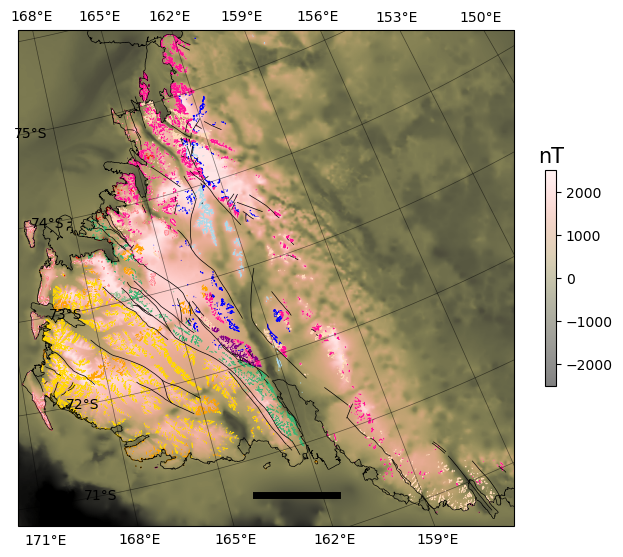

In [16]:
cmap_topo =  cm.turku

figure1 = plt.figure(figsize=(8,8),facecolor='white')
# # subplot tectonic data
ax2 = plt.subplot(1, 1, 1 , projection=ccrs.SouthPolarStereo())
# plt.title('formation',fontsize=15)

polygon_MessaRange.plot(ax=ax2, alpha=1, facecolor="None", edgecolor="k", linewidth=2)


Meander_intrusive_suite.boundary.plot(ax=ax2 , color='red', alpha=1, linewidth=.5)
Melbourne_volcanic.boundary.plot(ax=ax2 , color='lightpink', alpha=1, linewidth=.5)
Kirkpatrick_Basalt.boundary.plot(ax=ax2 , color='lightblue', alpha=1, linewidth=.5)
FD_and_Beacon_supergroup.boundary.plot(ax=ax2 , color='blue', alpha=1, linewidth=.5)
Admiralty_Igneous_Complex.boundary.plot(ax=ax2 , color='orange', alpha=1, linewidth=.5)
Wilson_Terrane.boundary.plot(ax=ax2 , color='peachpuff', alpha=1, linewidth=.5)
Granite_Harbour_Intrusives.boundary.plot(ax=ax2 , color='deeppink', alpha=1, linewidth=.5)
Lanterman.boundary.plot(ax=ax2 , color='purple', alpha=1, linewidth=.5)
Bowers_Terrane.boundary.plot(ax=ax2 , color='mediumseagreen', alpha=1, linewidth=.5)
Millen_Schist.boundary.plot(ax=ax2 , color='darkseagreen', alpha=1, linewidth=.5)
Robertson_Bay_Group.boundary.plot(ax=ax2 , color='gold', alpha=1, linewidth=.5)
im2 = plt.scatter(Bedrock_data[:,0] , Bedrock_data[:,1] , .1 , c=Bedrock_data[:,2] , alpha=0.5 , cmap = cmap_topo , vmin= -2500 , vmax = 2500)
fault.plot(ax=ax2 , color = 'k' ,  linewidth=0.5)
ax2.plot([0.6e6,0.6e6+100000],[-2.1e6,-2.1e6],'-k', linewidth=5) # 300 km scale bar
ax2.set_extent([169.5 , 155 , -75, -70.7], ccrs.PlateCarree())
ax2.gridlines(linewidth=0.5,draw_labels=True , color='k', alpha=0.5, linestyle='-' , rotate_labels=0)
Coastline.plot(ax=ax2 , color = 'k' , linewidth = 0.5)
# ax2.legend(loc='upper right')
cb = plt.colorbar(im2, shrink=.35)
cb.ax.set_title("nT",fontsize=15)
# plt.savefig('Formation_GeoMap_TAM.png',facecolor=figure1.get_facecolor(), transparent=True)

Text(0.5, 1.0, 'nT')

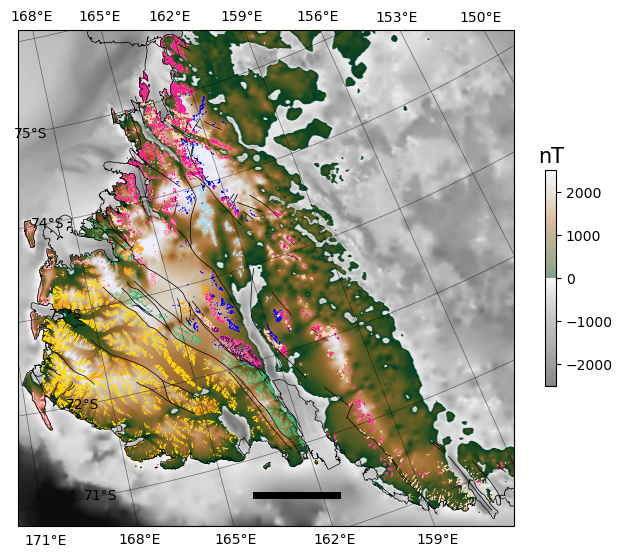

In [17]:
cmap_topo =  cm.fes

figure1 = plt.figure(figsize=(8,8),facecolor='white')
# # subplot tectonic data
ax2 = plt.subplot(1, 1, 1 , projection=ccrs.SouthPolarStereo())
# plt.title('formation',fontsize=15)

polygon_MessaRange.plot(ax=ax2, alpha=1, facecolor="None", edgecolor="k", linewidth=2)


Meander_intrusive_suite.boundary.plot(ax=ax2 , color='red', alpha=1, linewidth=.5)
Melbourne_volcanic.boundary.plot(ax=ax2 , color='lightpink', alpha=1, linewidth=.5)
Kirkpatrick_Basalt.boundary.plot(ax=ax2 , color='lightblue', alpha=1, linewidth=.5)
FD_and_Beacon_supergroup.boundary.plot(ax=ax2 , color='blue', alpha=1, linewidth=.5)
Admiralty_Igneous_Complex.boundary.plot(ax=ax2 , color='orange', alpha=1, linewidth=.5)
Wilson_Terrane.boundary.plot(ax=ax2 , color='peachpuff', alpha=1, linewidth=.5)
Granite_Harbour_Intrusives.boundary.plot(ax=ax2 , color='deeppink', alpha=1, linewidth=.5)
Lanterman.boundary.plot(ax=ax2 , color='purple', alpha=1, linewidth=.5)
Bowers_Terrane.boundary.plot(ax=ax2 , color='mediumseagreen', alpha=1, linewidth=.5)
Millen_Schist.boundary.plot(ax=ax2 , color='darkseagreen', alpha=1, linewidth=.5)
Robertson_Bay_Group.boundary.plot(ax=ax2 , color='gold', alpha=1, linewidth=.5)
im2 = plt.scatter(Bedrock_data[:,0] , Bedrock_data[:,1] , .1 , c=Bedrock_data[:,2] , alpha=0.5 , cmap = cmap_topo , vmin= -2500 , vmax = 2500)
fault.plot(ax=ax2 , color = 'k' ,  linewidth=0.5)
ax2.plot([0.6e6,0.6e6+100000],[-2.1e6,-2.1e6],'-k', linewidth=5) # 300 km scale bar
ax2.set_extent([169.5 , 155 , -75, -70.7], ccrs.PlateCarree())
ax2.gridlines(linewidth=0.5,draw_labels=True , color='k', alpha=0.5, linestyle='-' , rotate_labels=0)
Coastline.plot(ax=ax2 , color = 'k' , linewidth = 0.5)
# ax2.legend(loc='upper right')
cb = plt.colorbar(im2, shrink=.35)
cb.ax.set_title("nT",fontsize=15)
# plt.savefig('Formation_GeoMap_TAM.png',facecolor=figure1.get_facecolor(), transparent=True)

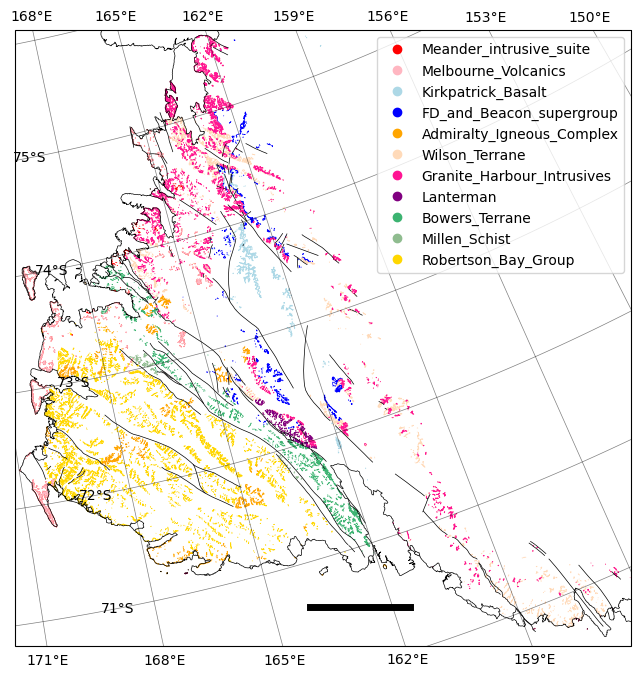

In [13]:
figure1 = plt.figure(figsize=(8,8),facecolor='white')
# # subplot tectonic data
ax2 = plt.subplot(1, 1, 1 , projection=ccrs.SouthPolarStereo())
# plt.title('formation',fontsize=15)

Meander_intrusive_suite.boundary.plot(ax=ax2 , color='red', alpha=1, linewidth=.5)
ax2.plot([0,0] , 'o' , color='red' , label='Meander_intrusive_suite')

Melbourne_volcanic.boundary.plot(ax=ax2 , color='lightpink', alpha=1, linewidth=.5)
ax2.plot([0,0] , 'o' , color='lightpink' , label='Melbourne_Volcanics')

Kirkpatrick_Basalt.boundary.plot(ax=ax2 , color='lightblue', alpha=1, linewidth=.5)
ax2.plot([0,0] , 'o' , color='lightblue' , label='Kirkpatrick_Basalt')

FD_and_Beacon_supergroup.boundary.plot(ax=ax2 , color='blue', alpha=1, linewidth=.5)
ax2.plot([0,0] , 'o' , color='blue' , label='FD_and_Beacon_supergroup')

Admiralty_Igneous_Complex.boundary.plot(ax=ax2 , color='orange', alpha=1, linewidth=.5)
ax2.plot([0,0] , 'o' , color='orange' , label='Admiralty_Igneous_Complex')

Wilson_Terrane.boundary.plot(ax=ax2 , color='peachpuff', alpha=1, linewidth=.5)
ax2.plot([0,0] , 'o' , color='peachpuff' , label='Wilson_Terrane')

Granite_Harbour_Intrusives.boundary.plot(ax=ax2 , color='deeppink', alpha=1, linewidth=.5)
ax2.plot([0,0] , 'o' , color='deeppink' , label='Granite_Harbour_Intrusives')

Lanterman.boundary.plot(ax=ax2 , color='purple', alpha=1, linewidth=.5)
ax2.plot([0,0] , 'o' , color='purple' , label='Lanterman')

Bowers_Terrane.boundary.plot(ax=ax2 , color='mediumseagreen', alpha=1, linewidth=.5)
ax2.plot([0,0] , 'o' , color='mediumseagreen' , label='Bowers_Terrane')

Millen_Schist.boundary.plot(ax=ax2 , color='darkseagreen', alpha=1, linewidth=.5)
ax2.plot([0,0] , 'o' , color='darkseagreen' , label='Millen_Schist')

Robertson_Bay_Group.boundary.plot(ax=ax2 , color='gold', alpha=1, linewidth=.5)
ax2.plot([0,0] , 'o' , color='gold' , label='Robertson_Bay_Group')

fault.plot(ax=ax2 , color = 'k' ,  linewidth=0.5)
ax2.plot([0.6e6,0.6e6+100000],[-2.1e6,-2.1e6],'-k', linewidth=5) # 300 km scale bar


ax2.set_extent([169.5 , 155 , -75, -70.7], ccrs.PlateCarree())

ax2.gridlines(linewidth=0.5,draw_labels=True , color='k', alpha=0.5, linestyle='-' , rotate_labels=0)
Coastline.plot(ax=ax2 , color = 'k' , linewidth = 0.5)
ax2.legend(loc='upper right')
plt.savefig('Formation_GeoMap_legend.png',facecolor=figure1.get_facecolor(), transparent=True)

In [14]:
Coastline = gpd.read_file('DATA//ADD_Coastline.gpkg')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


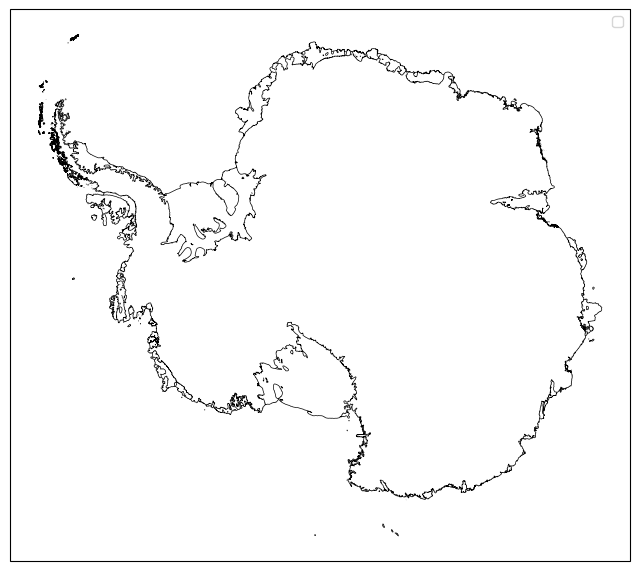

In [15]:
figure1 = plt.figure(figsize=(8,8),facecolor='white')
# # subplot tectonic data
ax2 = plt.subplot(1, 1, 1 , projection=ccrs.SouthPolarStereo())
# plt.title('formation',fontsize=15)




# ax2.gridlines(linewidth=0.5,draw_labels=True , color='k', alpha=0.5, linestyle='-' , rotate_labels=0)
Coastline.plot(ax=ax2 , color = 'k' , linewidth = 0.5)
ax2.legend(loc='upper right')
plt.savefig('Antarctica.png',facecolor=figure1.get_facecolor(), transparent=True)